Número de vezes para repetir o experimento: 100000
Depois de repetir 100000,obtivemos:


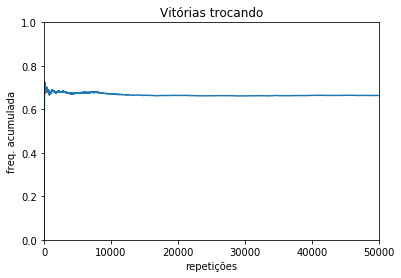

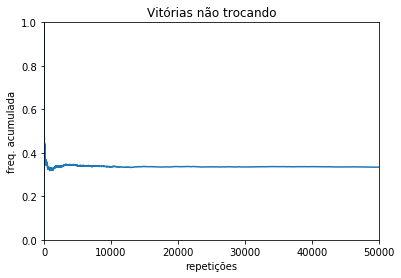

In [8]:
from random import randint
import matplotlib.pyplot as plt

n = int(input("Número de vezes para repetir o experimento: "))

#vetores com a frequência acumulada de vitórias
trocou = [0]
n_trocou = [0]

for i in range(1, n):
    #colocamos o premio
    premio = randint(0,2)

    #escolhemos a porta
    escolhido = randint(0,2)

    #removemos uma porta (aleatória) vazia e que não tenhamos escolhido
    removido = randint(0,2)
    while removido == escolhido or removido == premio:
        removido = randint(0,2)

    #troca = 1, não troca = 0
    if randint(0,1):
        #decidimos para qual ele vai mudar
        #impedindo que ele mude para o que foi removido
        if removido == 0:
            if escolhido == 1:
                escolhido = 2
            else:
                escolhido = 1
        elif removido == 1:
            if escolhido == 0:
                escolhido = 2
            else:
                escolhido = 0
        else:
            if escolhido == 0:
                escolhido = 1
            else:
                escolhido = 0

        #verificamos se ele ganhou
        if escolhido == premio:
            trocou.append(trocou[-1]+ 1)
        else:
            trocou.append(trocou[-1])

    #caso ele não tenha trocado de porta, verificamos se ele ganhou
    else:
        if escolhido == premio:
            n_trocou.append(n_trocou[-1] + 1)
        else:
            n_trocou.append(n_trocou[-1])

#calcular a frequencia acumulada em cada caso
for i in range(1, len(trocou)):
    trocou[i] = trocou[i]/i
for i in range(1, len(n_trocou)):
    n_trocou[i] = n_trocou[i]/i
            
#impressão dos resultados
print("Depois de repetir", str(n) + ",obtivemos:")
plt.plot(trocou)
plt.xlabel('repetições')
plt.ylabel('freq. acumulada')
plt.title("Vitórias trocando")
plt.axis([0.0, len(trocou), 0.0, 1.0])
plt.show()

#segundo grafico
plt.plot(n_trocou)
plt.xlabel('repetições')
plt.ylabel('freq. acumulada')
plt.title("Vitórias não trocando")
plt.axis([0.0, len(n_trocou), 0.0, 1.0])
plt.show()